# EDA, Feature Engineering and Modelling for Rotor Temperatures


In this project, I will demonstrate various techniques including data visualization, data exploration, machine learning and machine learning optimizations.

A description of all the attributes found in the dataset is as follows:

|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|ambient     |Numerical  |Continuous   |Ambient temperature by a thermal sensor near the stator.|
|coolant      |Numerical  |Continuous| The temperature of colant measured at the outflow.  |
|u_d   |Numerical  |Continuous  |d axis component of the stator voltage. |
|u_q  |Numerical  |Continuous  |q axis component of the stator voltage. |
|motor_speed|Numerical  |Continuous|The speed of a motor.    |
|torque   |Numerical  |Continuous|Torque induced by current.             |
|i_d |Numerical |Continuous   |d axis component of the stator current.          |
|i_q  |Numerical|Continuous   |q axis component of the stator current.     |
|pm      |Numerical|Continuous   |Permanent Magnent surface temperature representing the rotor temperature, measured by an infrared.|
|profile_id   |Catogorical|Nominal |each measurement session has a unique ID


## Table of Content

1. [Explorary Data Analysis](#1)
2. [Feature Engineering](#2)
3. [Model Development](#3)
4. [Results and Discussion](#4)

In [7]:
#Load libraries
library(psych)
library(ggplot2)
library(reshape2)
library(EnvStats)
library(tidyverse)
library(GGally)
library(dplyr)
library(MASS)
library(leaps)
library(lattice)
library(glmnet)
library(stats)
library(fastDummies)
library(car)
library(caret)
library(randomForest)

## 1. Exploratory Data Analysis <a class="anchor" id="1"></a>

In this section of the project, I will explore the dataset, to better understand the attributes and the domain knowledge behind these attributes. This section will have 2 main sub-sections: **Univariate Analysis** and **Multivariate Analysis**

In [15]:
df<-read.csv('pmsm_data.csv',header=TRUE)

#Take a look at the first and last few rows of df
head(df)
tail(df)

ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,profile_id
0.1176819,-1.040829,-1.0267303,0.9250645,1.2124813,0.3586899,-0.8343090,0.3229330,-0.08831267,4
-0.5547717,-1.087189,-1.2258921,0.5125759,2.0241232,0.2841797,-1.3638294,0.2340145,0.71040170,4
-0.7722329,-1.063652,0.2988575,0.9562448,-0.1402458,-0.2591392,1.0291220,-0.2457111,-1.59260400,4
0.2199584,-1.083475,-1.0261079,0.9278145,1.2124836,0.3574240,-0.8381095,0.3228101,-0.14167030,4
0.4015749,-1.078981,0.3155328,-0.7094008,-0.9518901,-0.2562895,1.0291730,-0.2457109,-1.96488810,4
-0.7697667,-1.089577,0.2999456,0.9589649,-0.1402460,-0.2592790,1.0291333,-0.2457186,-1.77564350,4


,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,profile_id
15142,-0.6974700,1.49688820,0.3176318,-1.324828,-1.22242870,-0.2556397,1.0291415,-0.2457166,-0.835639600,81
15143,-0.1489317,1.74755540,0.2998942,-1.294876,-1.22242950,-0.2556397,1.0291376,-0.2457070,-0.993255400,81
15144,-0.5091294,1.46453430,-0.7905264,1.208344,0.80467504,0.3245067,-0.2590534,0.3256622,-0.004079474,81
15145,-0.1557110,-0.04516133,0.3011341,-1.294293,-1.22243130,-0.2556397,1.0291479,-0.2457459,-0.771475800,81
15146,-0.1561356,-0.04458057,0.3000615,-1.293905,-1.22242890,-0.2556397,1.0291611,-0.2456962,-0.663378950,81
15147,-0.7672885,-0.30993983,0.3228580,1.125235,-0.03886923,-0.2813110,1.0211550,-0.2752085,-1.903265100,81


In [13]:
#check for dimensions of df
dim(df)

[1] 15147    10

There are `15147` rows and `10` columns in this dataset. Next, we look at some overall non-graphical characteristics of the dataset as well as the attributes.

In [14]:
#Look at the structure of df
str(df)

'data.frame':	15147 obs. of  10 variables:
 $ ambient    : num  0.118 -0.555 -0.772 0.22 0.402 ...
 $ coolant    : num  -1.04 -1.09 -1.06 -1.08 -1.08 ...
 $ u_d        : num  -1.027 -1.226 0.299 -1.026 0.316 ...
 $ u_q        : num  0.925 0.513 0.956 0.928 -0.709 ...
 $ motor_speed: num  1.212 2.024 -0.14 1.212 -0.952 ...
 $ torque     : num  0.359 0.284 -0.259 0.357 -0.256 ...
 $ i_d        : num  -0.834 -1.364 1.029 -0.838 1.029 ...
 $ i_q        : num  0.323 0.234 -0.246 0.323 -0.246 ...
 $ pm         : num  -0.0883 0.7104 -1.5926 -0.1417 -1.9649 ...
 $ profile_id : int  4 4 4 4 4 4 4 4 4 4 ...


Beside `profile_id` being of integer type, all the other attributes are of continuous numerical type.


### Univariate Analysis

Next, we can take a look at the spread of `profile_id`, and examine the composition of the dataset

Total number of profiles:  52 
Distribution of records for each profile:

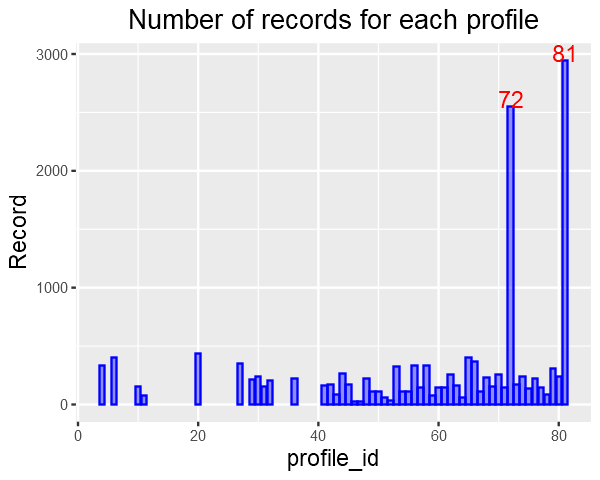

In [25]:
cat('Total number of profiles: ',length(unique(df$profile_id)),'\n')

cat('Distribution of records for each profile:')

options(repr.plot.width=5, repr.plot.height=4)

profile_n<-df %>% group_by(profile_id) %>% count() 
profile_n$label<-' '
mutatedlabel=profile_n[profile_n$profile_id==72|profile_n$profile_id==81,]%>% mutate(label=profile_id)
profile_n[profile_n$profile_id==72|profile_n$profile_id==81,]$label=as.character(mutatedlabel$label)


profile_n %>% ggplot(aes(x=profile_id, y=n))+geom_bar(stat='identity',colour='blue',fill='blue',alpha=0.4)+ 
geom_text(
    aes(label = label),
    colour = "red", size = 5,
    vjust = 0.1, position = position_dodge(0.8))+ggtitle('Number of records for each profile')+ylab('Record')+
theme(plot.title = element_text(size=16,hjust=0.5),
      axis.title.y = element_text(size = rel(1.2), angle = 90),
      axis.title.x = element_text(size = rel(1.2)),
      legend.position='none' )

We can see there are a range of records measured in various `profile_id`, the peaks are 72 and 81 which are going to be our testing dataset.  

Next, we inspect whether different profile has different distribution of `pm`

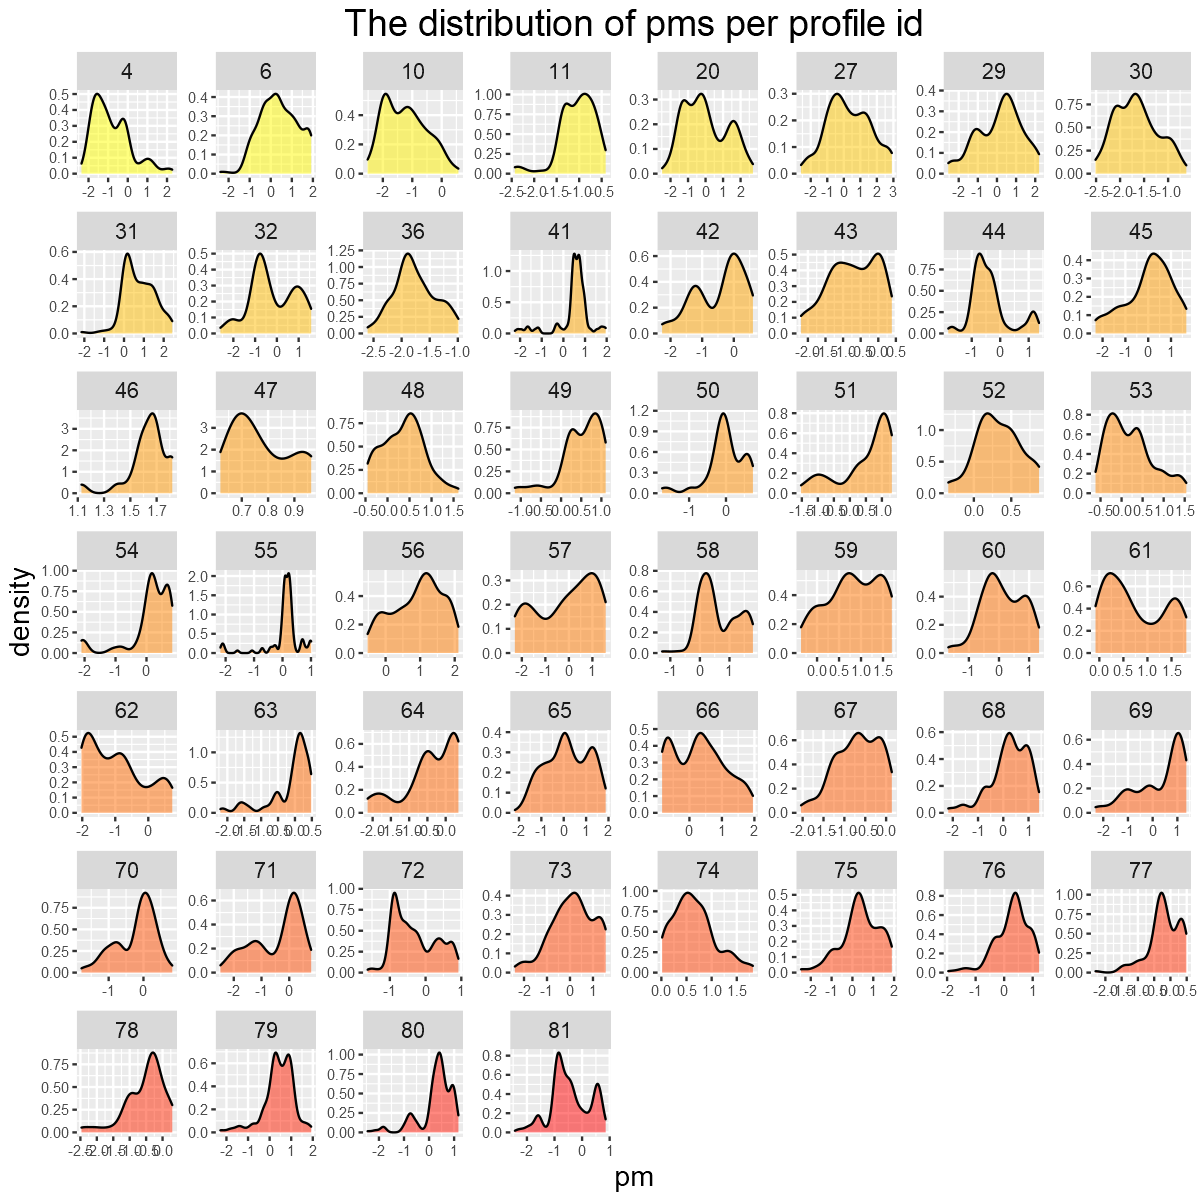

In [32]:
options(repr.plot.width=10, repr.plot.height=10)

#Plot a density plot for pms grouped by profile ids
ggplot(df, aes(x=pm,fill=profile_id)) + geom_density(aes(fill=profile_id),alpha=0.5)+
 facet_wrap(~profile_id, scales="free")+ggtitle("The distribution of pms per profile id")+
theme( strip.text.x = element_text(size = 13),plot.title = element_text(size=22,hjust=0.5),
      axis.title.y = element_text(size = rel(1.5), angle = 90),
      axis.title.x = element_text(size = rel(1.5)),
      legend.position='none' )+ scale_fill_gradient(low = "yellow", high = "red")

We can see that different sessions have different distribution of pms. We need to be mindful about it,  when we train the model we should use data from a variety of sessions, so that the model is not biased towards any particular session. Regardless, our model should be able to make predictions regardless of which sessions the measurement come from. Therefore, we drop `profile_id` column.

Next I will look at the Descriptive statistics of the 9 attributes(8 used for prediction and 1 used as the target variable). From here onwards, I will only examine the training data, as the testing data is used for testing the models. 


In [33]:
#Get training data
train=subset(df,!(profile_id %in% c(72,81)))

#Get testing data
test=subset(df, profile_id %in% c(72,81))

In [48]:
#Descriptive Summary of training data
summary(train[-10])

#Some additional descriptive statistics 
round(describe(train[-10]),3)

    ambient             coolant               u_d           
 Min.   :-3.327762   Min.   :-1.237039   Min.   :-1.653711  
 1st Qu.:-0.601962   1st Qu.:-1.040703   1st Qu.:-0.850785  
 Median : 0.294721   Median :-0.185142   Median : 0.245695  
 Mean   : 0.004568   Mean   :-0.009028   Mean   :-0.009845  
 3rd Qu.: 0.687956   3rd Qu.: 0.609588   3rd Qu.: 0.358766  
 Max.   : 2.710575   Max.   : 2.278400   Max.   : 2.273458  
      u_q             motor_speed           torque              i_d          
 Min.   :-1.814612   Min.   :-1.22244   Min.   :-3.31634   Min.   :-3.17644  
 1st Qu.:-0.887766   1st Qu.:-0.95187   1st Qu.:-0.27352   1st Qu.:-0.76252  
 Median :-0.092686   Median :-0.14024   Median :-0.13641   Median : 0.15256  
 Mean   : 0.008343   Mean   : 0.01206   Mean   : 0.01013   Mean   :-0.01624  
 3rd Qu.: 0.863689   3rd Qu.: 0.86094   3rd Qu.: 0.56115   3rd Qu.: 1.01184  
 Max.   : 1.770184   Max.   : 2.02413   Max.   : 3.01379   Max.   : 1.06017  
      i_q                  

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
ambient,1,9652,0.005,1.013,0.295,0.094,0.608,-3.328,2.711,6.038,-0.873,0.746,0.01
coolant,2,9652,-0.009,1.002,-0.185,-0.120,1.266,-1.237,2.278,3.515,0.651,-0.716,0.01
u_d,3,9652,-0.010,1.003,0.246,-0.053,1.019,-1.654,2.273,3.927,0.220,-0.527,0.01
u_q,4,9652,0.008,0.996,-0.093,-0.030,1.308,-1.815,1.770,3.585,0.191,-1.263,0.01
motor_speed,5,9652,0.012,0.999,-0.140,-0.047,1.301,-1.222,2.024,3.247,0.318,-1.173,0.01
torque,6,9652,0.010,1.009,-0.136,0.022,0.753,-3.316,3.014,6.330,-0.049,0.719,0.01
i_d,7,9652,-0.016,1.002,0.153,0.095,1.277,-3.176,1.060,4.237,-0.601,-0.763,0.01
i_q,8,9652,0.009,1.009,-0.117,0.022,0.758,-3.309,2.914,6.223,-0.086,0.716,0.01
pm,9,9652,0.011,1.013,0.115,0.042,0.995,-2.605,2.905,5.510,-0.252,-0.369,0.01


Based on the descriptive statistics, apart from `profile_id`, all attributes are at a range of between -3.5 to 3.5, and the median for each attribute is roughly around 0. There are also no missing data, as all columns have exactly 9652 observations. 

However, upon closer examination of domain knowledge, it is impossible that the actual values for all these attributes are within this range. For instance, we can not have the actual motor speed, or current measurements as negative, or the rotor temperature or ambient temperature to be always within the range of -3.5 to 3.5. **Therefore the data must have undergone some kind of standardisation/scalling process.**

Therefore, I will not do any standardisation for the dataset. 

In addition, by looking at `sd` column in the Descriptive Statistics, we can tell that the standard deviations of the predictors are in good ranges, as they are not too small. Small standard deviation of predictors might result in the models not being able to extract much information for predictions.


Next, I will look at the distributions of each variable.

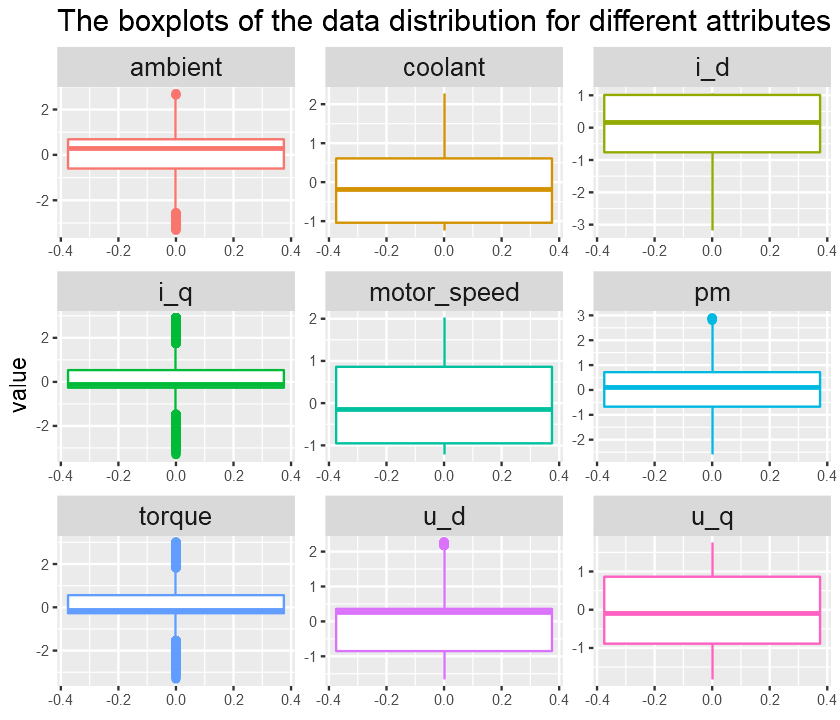

In [45]:
#Reshape the dataframe for easier plotting purpose
df_long<-pivot_longer(train,names(train[-10]))

#Plot the boxplots
options(repr.plot.width=7, repr.plot.height=6)

ggplot(df_long,aes(y=value,colour=name))+geom_boxplot()+
    facet_wrap(~name, scales="free")+ggtitle("The boxplots of the data distribution for different attributes")+
    theme( strip.text.x = element_text(size = 15),plot.title = element_text(size=18,hjust=0.5),
      axis.title.y = element_text(size = rel(1.2), angle = 90),legend.position='none' )

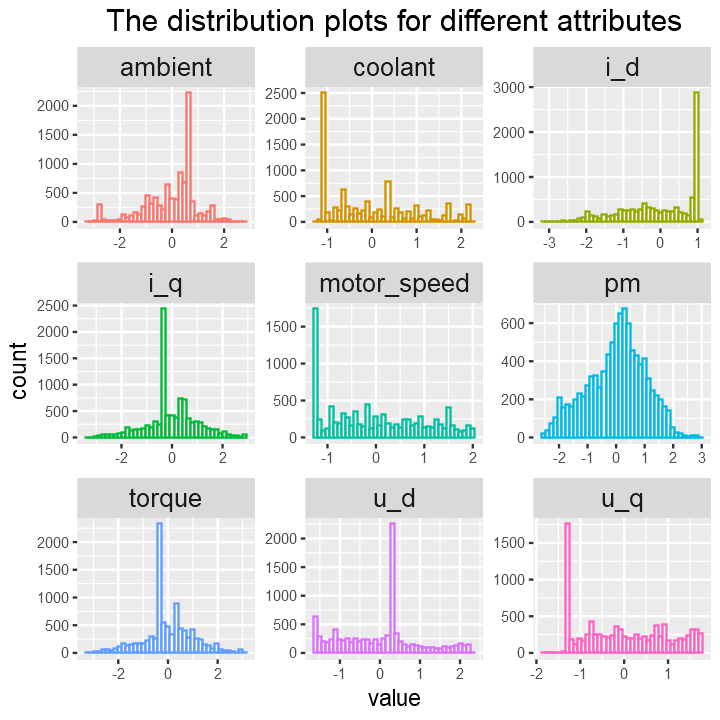

In [47]:
#Plot the histogram
options(repr.plot.width=6, repr.plot.height=6)

ggplot(df_long, aes(x=value,colour=name)) + 
  geom_histogram(fill='white',bins=40)+facet_wrap(~name, scales="free")+
  ggtitle("The distribution plots for different attributes")+
  theme( strip.text.x = element_text(size = 15),plot.title = element_text(size=18,hjust=0.5),
      axis.title.y = element_text(size = rel(1.2), angle = 90),
      axis.title.x = element_text(size = rel(1.2)),
      legend.position='none' )

First thing that we can immediately notice is that out of all the attributes, the distribution of `pm` is the closest to a normal distribution.

Based on the boxplot and the histogram, the target variable `pm` and `ambient` share relatively similar distributions.

In addition, we can see that `i_q` and `torque` share very similar data distribution, as shown in both the boxplot and the histogram. This suggests that the two variables might be corellated. 

On the other hand, `motor_speed`, `u_q` and `coolant` also seem to have similar data distribution, where they all peak in the lower end, and the rest of the data have a relatively uniform distribution and have relatively low counts. This is in stark contrast to `i_d`, where the peak is in the upper end, and the rest of the data has low counts with an uniform distribution. 


Therefore, in the next section where I conduct more multivariate analysis, I will inspect more closely the interection among these variables: 

-  `pm` and `ambient`  

- `i_q`and `torque`

- `motor_speed`, `u_q` and `coolant`.

### Multivariate Analysis

## 2. Feature Engineering <a class="anchor" id="2"></a>

## 3. Model Development <a class="anchor" id="3"></a>

Our goal is to use attributes `ambient`, `coolant`, `u_d`, `u_q`, `motor_speed`, `torque`, `i_d` and `i_q` to build models that can predict the target variable `pm`. In the process, we make use of `profile_id` to separate training and testing set.

## 4. Results and Discussion <a class="anchor" id="4"></a>

In [ ]:
_